In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn import model_selection, svm, datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import datetime as dt
import importlib as il
import matplotlib.pyplot as plt

In [3]:
#My own functions to make random forest modeling easier.
import randfor_functions as rf
dir(rf)
#find optimal depth for a random forest classifier
#run random forest classifier and get info
#run random forest classifier and print info
#run random forest regressor and get info
#run random forest regressor and print info
#visualize classifier

['ExtraTreesClassifier',
 'RandomForestClassifier',
 'RandomForestRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'confusion_matrix',
 'cross_val_score',
 'datasets',
 'dt',
 'make_classification',
 'model_selection',
 'np',
 'rand_find_depth',
 'randfor_class_report',
 'randfor_class_talk',
 'randfor_reg_report',
 'randfor_reg_talk',
 'sklearn',
 'svm',
 'test_multiple_samples',
 'train_test_split',
 'tree_vis']

In [177]:
#Run this to reload the rf module after I make changes
il.reload(rf)

<module 'randfor_functions' from 'C:\\Users\\marcu\\Dropbox\\Capstone_2\\randfor_functions.py'>

In [4]:
starttime = dt.datetime.now()
propval = pd.read_csv('clean_propval.csv')
print('elapsed time:', dt.datetime.now()-starttime)

C:\Users\marcu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,18,35,58,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


elapsed time: 0:01:22.633613


In [ ]:
propval.head()

In [ ]:
#Start with runnning what we can

In [ ]:
#TODO:Check these
#ind_vars = propval[['BORO', 'BLOCK', 'LOT', 'SECVOL', 'YRB', 'LND_AREA', 'STORY',
#                   'ZIP', 'YRA1', 'PROTEST0',
#                   'PROTEST1', 'PROTEST5', 'PROTEST6', 'PROTEST8', 'PROTEST9',
#                   'PROTEST1L', 'PROTEST6L', 'PROTEST6NL', 'PROTEST6E',
#                   'PROTEST8L', 'TN_AVT_A']]
#ind_vars = propval[['BORO', 'BLOCK', 'LOT', 'SECVOL', 'YRB', 'LND_AREA',
#                   'ZIP', 'YRA1', 'PROTEST0', 'TN_AVT_A']]
#dep_vars = propval['FN_AVT_A']

In [ ]:
#Due to space issues, we're going to test one borough at a time

In [6]:
man_propval = propval[propval.BORO == 1]
bron_propval = propval[propval.BORO == 2]
broo_propval = propval[propval.BORO == 3]
que_propval = propval[propval.BORO == 4]
sta_propval = propval[propval.BORO == 5]

In [44]:
boro_propval = [man_propval, bron_propval, broo_propval, que_propval, sta_propval]
boro_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

In [8]:
for x in boro_propval:
    print(len(x))

50598
631435
1738549
2331166
986727


In [9]:
for boro in boro_propval:
    boro_mean = np.mean(boro.FN_AVT_A)
    boro.EXPENSIVE = boro.FN_AVT_A >= boro_mean

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
propval_mean = np.mean(propval.FN_AVT_A)
propval['EXPENSIVE'] = propval['FN_AVT_A'] >= propval_mean

In [10]:
#Overall the expensive metric looks to be a good classifier. Least even with manhattan data,
#but still over 1/3 of the data.
for boro in boro_propval:
    print(boro.EXPENSIVE.value_counts())

False    32621
True     17977
Name: FN_AVT_A, dtype: int64
False    330598
True     300837
Name: FN_AVT_A, dtype: int64
False    988462
True     750087
Name: FN_AVT_A, dtype: int64
False    1356534
True      974632
Name: FN_AVT_A, dtype: int64
False    548966
True     437761
Name: FN_AVT_A, dtype: int64


In [205]:
ind_names = ['BLOCK', 'LOT', 'SECVOL', 'YRB', 'LND_AREA', 'YRA1', 'PROTEST0']
def get_class_vars(data, ind_names):
    ind_vars = data[ind_names]
    dep_vars = data.EXPENSIVE
    return ind_vars, dep_vars

def get_reg_vars(data, ind_names):
    ind_cla_vars = data[ind_names]
    dep_cla_vars = data.FN_AVT_A
    return ind_vars, dep_vars

In [52]:
ind_vars, dep_vars = get_class_vars(man_propval)

In [53]:
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 0.9366765046906292
test score: 0.9284584980237154
f1 score 0.8995448995448997
confusion_matrix:
[[7693  453]
 [ 452 4052]]
precision score: 0.8994450610432853
recall score: 0.8996447602131439
columns: 7
rows: 50598
total data: 354186
feature importances:
BLOCK: 0.5152191220269963
SECVOL: 0.2594833655162945
LND_AREA: 0.11275374906304683
YRA1: 0.06382840726531648
LOT: 0.03131294058985393
YRB: 0.015428964103437748
PROTEST0: 0.0019734514350542736
elapsed time: 0:00:46.097949


In [54]:
ind_vars, dep_vars = get_reg_vars(man_propval)

In [55]:
rf.randfor_reg_talk(ind_vars, man_propval.FN_AVT_A, 1000, 20, None, 100)

r score(train data): 0.8776282371669062
r score (test data): 0.8584110278989355
feature importances
BLOCK: 0.49235889330091576
LND_AREA: 0.2471562676556133
SECVOL: 0.18613356667969574
YRA1: 0.036420522990363496
LOT: 0.021897023072822507
YRB: 0.01236403047909034
PROTEST0: 0.003669695821498877
elapsed time: 0:00:59.830646


In [ ]:
#According to these results, BLOCK and SECVOL are pretty important. I haven't been able to determine
#what SECVOL is, but I suspect it's geographical, so I'm excluding it from the data
#in favor of BLOCK. LND_AREA is pretty valuable, but year built is actually less important
#than year of alteration. Also, I see that protest and lot have almost no value. The YRB thing may
#be because I picked a bad fill for the YRB zeroes, but when they take only 5% of the dataset,
#it shouldn't be a big issue.

In [ ]:
#Valuable features:
#BLOCK, LND_AREA
#YRA1

In [ ]:
#Irrelevant features:
#SECVOL, ZIP, YEAR4, STORY, PROTEST0, YRB, L_ACRE

In [78]:
ind_names = ['BLOCK', 'LND_AREA', 'YRA1']
ind_vars, dep_vars = get_class_vars(man_propval)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 0.9265046906292822
test score: 0.9189723320158103
f1 score 0.8870772281590834
confusion_matrix:
[[7599  518]
 [ 507 4026]]
precision score: 0.8860035211267606
recall score: 0.8881535407015222
columns: 3
rows: 50598
total data: 151794
feature importances:
BLOCK: 0.8054197753238714
LND_AREA: 0.12477866877137987
YRA1: 0.06980155590474867
elapsed time: 0:00:26.361522


In [31]:
rf.randfor_reg_talk(ind_vars, man_propval.FN_AVT_A, 1000, 20, None, 100)

r score(train data): 0.7780581697390327
r score (test data): 0.766040156513421
BORO 0.6381318954536392
BLOCK 0.26611486524380734
LOT 0.09575323930255346
SECVOL 0.0
elapsed time: 0:00:36.321338


In [ ]:
#Secvol is complely useless here, which is interesting. I'm thinking it's probably not worth
#including going forward.

In [ ]:
#Next: Check what happens when I add in tentative valuation.

In [42]:
ind_names = ['BORO', 'BLOCK', 'LOT', 'TN_AVT_A']
ind_vars, dep_vars = get_class_vars(man_propval)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 1.0
test score: 1.0
f1 score 1.0
confusion_matrix:
[[8089    0]
 [   0 4561]]
precision score: 1.0
recall score: 1.0
columns: 4
rows: 50598
total data: 202392
feature importances:
BORO: 1.0
BLOCK: 0.0
LOT: 0.0
TN_AVT_A: 0.0
elapsed time: 0:00:10.119749


In [37]:
rf.randfor_reg_talk(ind_vars, man_propval.FN_AVT_A, 1000, 20, None, 100)

r score(train data): 0.9938870815449526
r score (test data): 0.9901967952493277
BORO 0.9999999991312722
BLOCK 8.681832425389132e-10
LOT 5.44482389288644e-13
TN_AVT_A 0.0
elapsed time: 0:00:44.432751


In [ ]:
#After reviewing 1976 US code supplement 1, page 584, section 10785, it looks like the
#tentative valuation becomes final unless contested by a protest within 30 days, so in most cases
#this is just the exact final value. Not much point there, but I will note that this seems to
#break the feature weighting. Not sure what's going on there.

In [ ]:
#So far, location seems to be far and away the most important factor. We'll see if this holds
#for the other boroughs.

In [79]:
#Going to run a full check to verify that these remain roughly as important across all five boroughs.
#Crude forest, but it'll tell me the essentials.
ind_names = ['BLOCK', 'LND_AREA', 'YRA1']
for boro in range(len(boro_propval)):
    print(boro_names[boro])
    print('------------------------')
    ind_vars, dep_vars = get_class_vars(boro_propval[boro])
    rf.randfor_class_talk(ind_vars, dep_vars, 75, 10, None, 500)
    print('------------------------')

Manhattan
------------------------
train score: 0.8958574891957416
test score: 0.8979446640316205
f1 score 0.8561239273375683
confusion_matrix:
[[7518  630]
 [ 661 3841]]
precision score: 0.8590919257436815
recall score: 0.8531763660595291
columns: 3
rows: 50598
total data: 151794
feature importances:
BLOCK: 0.8389062598241377
LND_AREA: 0.09250631869483918
YRA1: 0.06858742148102318
elapsed time: 0:00:01.716437
------------------------
Bronx
------------------------
train score: 0.7257018936770444
test score: 0.7252484812395872
f1 score 0.7126273803055801
confusion_matrix:
[[60710 21797]
 [21575 53777]]
precision score: 0.7115807023579538
recall score: 0.7136771419471282
columns: 3
rows: 631435
total data: 1894305
feature importances:
BLOCK: 0.5640241890290606
LND_AREA: 0.4314486029279496
YRA1: 0.004527208042989775
elapsed time: 0:00:51.044611
------------------------
Brooklyn
------------------------
train score: 0.8150456587911291
test score: 0.8153681914604798
f1 score 0.781105601108

In [ ]:
#Simplest possible approach: 
#Assume data is similar

In [ ]:
#Todo: Check corellation coefficient for geographical data
#Value leakage: protest based on final valuation?
#Convert datetimes to strings, on the fly convert to datetime for running operations

In [ ]:
#Block and land area continue to be relevant, but how much varies. Bronx, in particular,
#seems like it needs a better model. Total elapsed time to run this model for five separate 
#boroughs: ~15 minutes. I'm going to try again with the full propval and see how long this takes.

In [82]:
ind_vars, dep_vars = get_class_vars(propval)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 0.8453946879263619
test score: 0.8393963832906158
f1 score 0.7847557301470898
confusion_matrix:
[[784199  97548]
 [132857 420015]]
precision score: 0.8115243941317289
recall score: 0.7596966386433026
columns: 3
rows: 5738475
total data: 17215425
feature importances:
BLOCK: 0.6425262044754158
LND_AREA: 0.3307427377558141
YRA1: 0.0267310577687702
elapsed time: 6:39:16.351033


In [121]:
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))

In [122]:
ind_names = ['BORO', 'BLOCK', 'LND_AREA', 'YRB']

In [129]:
test = {1:'one', 2:'two', 3:'three'}

In [131]:
for n in test:
    print(n)
    print(test[n])

1
one
2
two
3
three


In [136]:
train_scores = []
test_scores = []
f1_scores = []
feature_weights = {}
starttime = dt.datetime.now()
for x in range(len(propval_samples)):
    ind_vars, dep_vars = get_class_vars(propval_samples[x])
    train_score, test_score, f1_score, cm, precision_score, recall_score, importances, indices =\
    rf.randfor_class_report(ind_vars, dep_vars, 1000, 20, None, 100)
    train_scores.append(train_score)
    test_scores.append(test_score)
    f1_scores.append(f1_score)
    for f in range(len(indices)):
        if indices[f] not in feature_weights:
            feature_weights[indices[f]] = [importances[indices[f]]]
        else:
            feature_weights[indices[f]].append(importances[indices[f]])
    print('test complete')
print('train scores mean, std: ', np.mean(train_scores), ', ', np.std(train_scores))
print('test scores mean, std: ', np.mean(test_scores), ', ', np.std(test_scores))
print('f1 scores mean, std: ', np.mean(f1_scores), ', ', np.std(f1_scores))
print('feature weights mean, std:')
for f in feature_weights:
    print(ind_vars.columns[indices[f]], ': ', np.mean(feature_weights[f]), ', ',np.std(feature_weights[f]))
print('elapsed time: ', dt.datetime.now()-starttime)

test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
train scores mean, std:  0.8526952925321808 ,  0.0010987143317246
test scores mean, std:  0.8371854743151879 ,  0.0027844561208039673
f1 scores mean, std:  0.7845364236615975 ,  0.003590957928846188
feature weights mean, std:
LND_AREA :  0.4010715874060331 ,  0.006870920592105572
YRB :  0.21710914777524323 ,  0.003921618465457078
BORO :  0.2048680324221542 ,  0.002832978517139833
BLOCK :  0.1769512323965694 ,  0.006531811438680351
elapsed time:  0:10:19.443745


In [139]:
ind_names = ['ZIP', 'LND_AREA', 'YRB']

In [143]:
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
train scores mean, std:  0.8385101538175566 ,  0.001617041977700226
test scores mean, std:  0.8236425733602843 ,  0.0021518986147834886
f1 scores mean, std:  0.7646996361579047 ,  0.004658471753282114
feature weights mean, std:
ZIP :  0.5156208572965355 ,  0.004517429985682256
LND_AREA :  0.2618801428147548 ,  0.003013750068880934
YRB :  0.22249899988870978 ,  0.0040514430835339186
elapsed time:  0:07:45.079431


In [ ]:
#Looks like a random sample will give us pretty good data with minimal variation. Impressive.

In [ ]:
#OK: We want to avoid data corellation. BLOCK and BORO overlap because manhattan never goes above
#2255 but bronx has almost 6K, brooklyn and staten 8K, Queens 16. ZIP avoids that, but is less
#precise.
#BLOCK is the most precise but also overlapps. 
#Splitting the data up by borough and modeling each one independently creates its own, worse problems.


In [ ]:
#Trying to keep these tests free of corellation. ZIP has the geographical component.
#LND_AREA has the land-area component. YRB has the year constructed. YEAR4 has the year evaluated,
#which is a little more dubious to include but still valuable data.

In [159]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4']
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
train scores mean, std:  0.8461801198940473 ,  0.0013864844438331865
test scores mean, std:  0.8296786784693664 ,  0.0033929705319577946
f1 scores mean, std:  0.7728420066640688 ,  0.0055135442166481105
feature weights mean, std:
ZIP :  0.482559667651494 ,  0.004957850569744491
LND_AREA :  0.24640864933086798 ,  0.002878857043893488
YRB :  0.20826085920858822 ,  0.004084950746674222
YEAR4 :  0.06277082380904987 ,  0.0018634506935102538
elapsed time:  0:08:32.680486


In [ ]:
#Minimal improvement, but adding year does appear to be beneficial.

In [163]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4', 'TOT_UNIT']
propval_samples = propval.sample(frac = .01, replace = False)
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
train scores mean, std:  0.8548399089177007 ,  0.000994741406410473
test scores mean, std:  0.8380846169930998 ,  0.0029171339384769226
f1 scores mean, std:  0.7850867394929016 ,  0.0027091931171312226
feature weights mean, std:
ZIP :  0.40837771904944314 ,  0.003875514229868659
LND_AREA :  0.2225074682762902 ,  0.00936392017170405
YRB :  0.17858362214371926 ,  0.005680889452602274
YEAR4 :  0.1282253457176934 ,  0.004093541427995821
TOT_UNIT :  0.06230584481285399 ,  0.003144461065554125
elapsed time:  0:08:47.433632


In [ ]:
#TOT_UNIT may have some geopgraphical connotations. The interesting thing is that YEAR4 jumped
#in value when we added this.

In [166]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4', 'RES_UNIT']
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
train scores mean, std:  0.8543380268599842 ,  0.0014129266863105508
test scores mean, std:  0.8376036802118911 ,  0.0029285114892480864
f1 scores mean, std:  0.7832890870706193 ,  0.0036542459232493055
feature weights mean, std:
ZIP :  0.40105287955821617 ,  0.008594994302847478
LND_AREA :  0.21617776719185242 ,  0.005072005556022113
YRB :  0.17878658922072346 ,  0.0024040192016873112
YEAR4 :  0.14170118294005368 ,  0.006228748019906632
RES_UNIT :  0.062281581089154346 ,  0.0023036834960813058
elapsed time:  0:08:54.822935


In [ ]:
#RES_UNIT and TOT_UNIT almost completely identical.

In [169]:
ind_names = ['ZIP', 'L_ACRE', 'YRB', 'YEAR4', 'TOT_UNIT']
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
test complete
train scores mean, std:  0.8219201635763742 ,  0.001584393993606609
test scores mean, std:  0.8082107757719383 ,  0.004543862612148498
f1 scores mean, std:  0.7399788741105205 ,  0.006865499855129202
feature weights mean, std:
ZIP :  0.5801200923251771 ,  0.006456949123808431
TOT_UNIT :  0.22087215200834223 ,  0.008295443884611061
L_ACRE :  0.11986867628493539 ,  0.006060550672037802
YEAR4 :  0.07459215588206228 ,  0.0026250594766308206
YRB :  0.004546923499482982 ,  0.0008597245441224705
elapsed time:  0:06:26.297844


In [ ]:
#L_ACRE underperforms against LND_AREA

In [207]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 0.844927738277801
test score: 0.8290234892311982
f1 score 0.7727230612433986
confusion_matrix:
[[7724 1071]
 [1382 4170]]
precision score: 0.795649685174585
recall score: 0.7510806916426513
columns: 4
rows: 57385
total data: 229540
feature importances:
ZIP: 0.47988740716416683
LND_AREA: 0.25052796020481033
YRB: 0.2065285136572892
YEAR4: 0.06305611897373373
elapsed time: 0:00:50.808684


In [208]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB', 'YEAR4']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 0.8188112830521864
test score: 0.7991914685997072
f1 score 0.7304705772289269
confusion_matrix:
[[7562 1236]
 [1645 3904]]
precision score: 0.7595330739299611
recall score: 0.7035501892232835
columns: 4
rows: 57385
total data: 229540
feature importances:
ZIP: 0.5878891238139418
YRB: 0.21416658921643789
TOT_UNIT: 0.12230218987954736
YEAR4: 0.07564209709007302
elapsed time: 0:00:36.207392


In [209]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB', 'YEAR4', 'LND_AREA']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

train score: 0.8565221432222687
test score: 0.8408726563044538
f1 score 0.7869739665951293
confusion_matrix:
[[7847  945]
 [1338 4217]]
precision score: 0.8169314219294846
recall score: 0.7591359135913591
columns: 5
rows: 57385
total data: 286925
feature importances:
ZIP: 0.40208515889592245
LND_AREA: 0.21868991999882914
YRB: 0.18584003756765963
TOT_UNIT: 0.13508716763706607
YEAR4: 0.05829771590052264
elapsed time: 0:00:55.091313


In [210]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars = propval_samples[['ZIP', 'LND_AREA', 'YRB', 'YEAR4', 'TOT_UNIT']]
dep_var = propval_samples['EXPENSIVE']

In [211]:
train_data, test_data, rf_data = rf.rand_find_depth(1000, ind_vars, dep_var, 20, 100)

done with test  0
done with test  1
done with test  2
done with test  3
done with test  4
done with test  5
done with test  6
done with test  7
done with test  8
done with test  9
done with test  10
done with test  11
done with test  12
done with test  13
done with test  14
done with test  15
done with test  16
done with test  17
done with test  18
done with test  19


In [14]:
plt.plot(train_data, ls = '--')
plt.plot(test_data, c = 'black')
plt.xlabel('Maximum depth')
plt.ylabel('Random Forest score')
plt.title('Random forest score at varying depth')

NameError: name 'train_data' is not defined

In [5]:
max(propval.FN_AVT_A)

27468900

In [6]:
manhattan = propval[propval.BORO == 1]

In [7]:
np.mean(manhattan)

KeyboardInterrupt: 

In [10]:
np.mean(manhattan.FN_AVT_A)

148710.814380015

(0, 1.5)

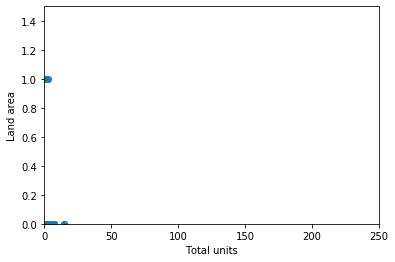

In [15]:
plt.scatter(x = propval.TOT_UNIT, y = propval.LND_AREA)
plt.xlabel('Total units')
plt.ylabel('Land area')
plt.xlim((0, 250))
plt.ylim((0, 1.5))